In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os.path import isfile, join
from os import listdir
import time
import math

In [80]:
folder = 'obrazy'
for i in range(19):
    if (i>8):
        path = folder + '/3mm9Hz_C001H001S000100'+str((i+1)*100+1)+'.jpg'  
    else:
        path = folder + '/3mm9Hz_C001H001S0001000'+str((i+1)*100+1)+'.jpg'
    #path = folder + '/3mm9Hz_C001H001S0001000350.jpg'
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = img[200:348,330:830]
    org=cv2.imread(path)
    org = org[200:348,330:830]
    ret,img = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    kon=[]
    for j in contours:
        if len(j)>30:
            kon.append(j)
    punkty=[kon[0][len(kon[0])-3][0],kon[0][len(kon[0])-10][0]]
    x=punkty[0][0]-punkty[1][0]
    y=punkty[0][1]-punkty[1][1]
    kat=np.arccos(x/(np.sqrt(x*x+y*y)))
    kat=360*kat/(2*math.pi)
    zera = np.zeros_like(img)
    cv2.drawContours(zera, kon, 0, 255, 5)
    cv2.line(org, (punkty[1][0]-2*x,punkty[1][1]-2*y),(punkty[0][0],punkty[0][1]), (0,0,255), thickness=2)
    cv2.imshow('',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
folder = 'obrazy'
katdeg=[]
for i in range(1987):
    if (i<=8):
        path = folder + '/3mm9Hz_C001H001S000100000'+str(i+1)+'.jpg'  
    elif (i<=98):
        path = folder + '/3mm9Hz_C001H001S00010000'+str(i+1)+'.jpg'
    elif (i<=998):
        path = folder + '/3mm9Hz_C001H001S0001000'+str(i+1)+'.jpg'
    else:
        path = folder + '/3mm9Hz_C001H001S000100'+str(i+1)+'.jpg'
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = img[200:348,330:830]
    #org=cv2.imread(path)
    #org = org[200:348,330:830]
    ret,img = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    kon=[]
    for j in contours:
        if len(j)>30:
            kon.append(j)
    punkty=[kon[0][len(kon[0])-3][0],kon[0][len(kon[0])-12][0]]
    x=punkty[0][0]-punkty[1][0]
    y=punkty[0][1]-punkty[1][1]
    kat=np.arccos(x/(np.sqrt(x*x+y*y)))
    katdeg.append(360*kat/(2*math.pi))
    #zera = np.zeros_like(img)
    #cv2.drawContours(zera, kon, 0, 255, 5)
    #cv2.line(org, (punkty[1][0]-2*x,punkty[1][1]-2*y),(punkty[0][0],punkty[0][1]), (0,0,255), thickness=2)
    #cv2.imshow('',org)
    #cv2.waitKey(0)
#cv2.destroyAllWindows()

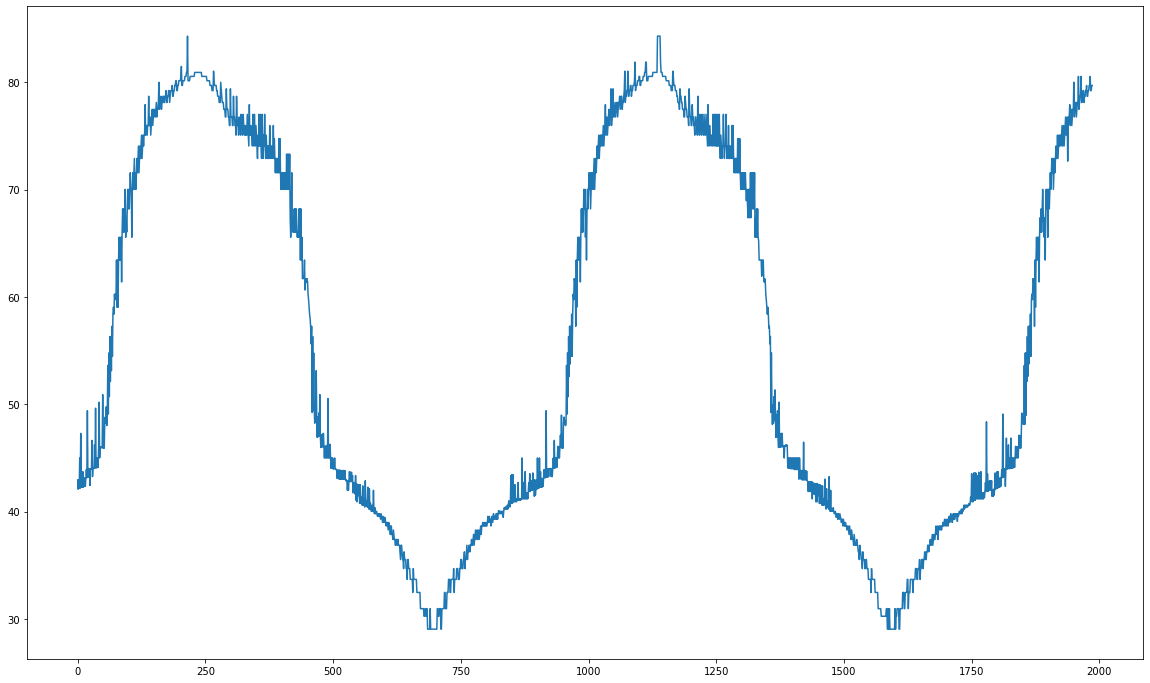

In [84]:
t=np.linspace(0,1986,1987)
plt.figure(figsize=(20,12))
plt.plot(t,katdeg)


In [76]:
import msgpack
def enc_full(obj):
    if type(obj) == list:
        code = 1
        return msgpack.ExtType(code, msgpack.packb(obj.tobytes()))
    raise TypeError
msgpack.dump(katdeg, open( 'dane.dat', "wb" ), default=enc_full)

In [78]:
import msgpack
def dnc(code, data):
    if code == 1:
        katdego = msgpack.unpackb(data)
        return katdego
    return msgpack.ExtType(code, data)
recovered_list = msgpack.load(open( 'dane.dat', "rb" ), ext_hook=dnc)